In [1]:
#Install graphviz
!pip install graphviz

In [2]:
# Statistique: graphique en %
!pip install dexplot

# Library

In [3]:
!pip install wheel
!pip install pandas

In [4]:
#Import libraries:

#Path
import os
# Pandas
import pandas as pd
# Numpy
import numpy as np
# matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Seaborn
import seaborn as sns
#Sklearn
import sklearn
# correct unbalanced dataset
from imblearn.over_sampling import SMOTE
# split train and test data
from sklearn.model_selection import train_test_split # also used for cross_validation
# Logistic Regression
from sklearn.linear_model import LogisticRegression
# accuracy calculation
from sklearn import metrics
# xgboost
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

#Performing grid search, Stratified K-fold CV: Hyperparameter tuning 
from sklearn.model_selection import learning_curve, GridSearchCV, StratifiedKFold

# Evaluate the accuracy of Stratified K-fold CV
from sklearn.metrics import accuracy_score

# Ipython tool for figsize
from IPython.core.pylabtools import figsize
# graphviz viz
from sklearn.tree import export_graphviz
# import dexplot % plot
import dexplot as dxp 
#JS viz https://arxiv.org/abs/1802.03888
import shap

In [5]:
# print the JS visualization code to the notebook
shap.initjs()

In [6]:
#os.environ["PATH"] += os.pathsep + 'D:\Users\Library\bin\graphviz' 

# I-Data preparation

### Load Data

In [7]:
# set display columns
pd.set_option('display.max_columns', 46)

In [8]:
# Path of the file to read
scoring_filepath = "D:/Jupyter/Simplon/Projet_Final/FINAL/Scoring.csv"

In [9]:
# Read the file into a variable fifa_data
df = pd.read_csv(scoring_filepath,parse_dates=True)
df.drop('NUMERO',axis=1,inplace=True) # enlever la colonne NUMERO

In [10]:
df.rename(columns = lambda x: x.replace(' ', '_'), inplace=True)

In [11]:
df.head()

,AGE,ANCIENNETE,CSP,CARTE_CLASSIQUE,CARTE_PREMIER,CARTE_ELECTRON,LIVRET,ASSURANCE_VIE,PTF_TITRE,PRÊT_PERS,PRÊT_IMMO,RESSOURCES,RESSOURCES_MONETAIRES,RESSOURCE_FINANCIERES,RESSOURCES_PARTS_SOCIALES,EMPLOIS,MVT_CREDITEURS,MVT_DEBITEUR,NB_JOURS_DEBITEURS,NB_JOURS_CREDITEURS,NB_OPERATIONS_CREDITRICES,NB_OPERATIONS_DEBITRICES,PNB,AGE_09,ANCIENNETE_09,CSP_09,CARTE_CLASSIQUE_09,CARTE_PREMIER_09,CARTE_ELECTRON_09,LIVRET_09,ASSURANCE_VIE_09,PTF_TITRE_09,PRÊT_PERS_09,PRÊT_IMMO_09,RESSOURCES_09,RESSOURCES_MONETAIRES_09,RESSOURCE_FINANCIERES_09,RESSOURCES_PARTS_SOCIALES_09,EMPLOIS_09,MVT_CREDITEURS_09,MVT_DEBITEUR_09,NB_JOURS_DEBITEURS_09,NB_JOURS_CREDITEURS_09,NB_OPERATIONS_CREDITRICES_09,NB_OPERATIONS_DEBITRICES_09,PNB_09
0,40,245,Employés,0,1,0,1,1,1,1,1,90 882,67 839,20 979,2 064,41 809,3 680,2 901,0,30,6,25,1 849,41.0,257.0,Employés,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,94 819,70 147,22 544,2 128,34 186,3 704,3 044,0.0,30.0,6.0,26.0,1 789
1,40,267,Employés,1,0,0,1,0,0,0,1,26 303,26 143,0,160,53 552,11 590,11 348,0,30,11,22,1 621,41.0,279.0,Employés,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,30 330,30 170,0,160,49 451,5 008,4 680,0.0,30.0,10.0,27.0,1 541
2,40,287,Ouvriers,1,0,0,1,1,0,0,1,6 453,1 292,5 001,160,92 744,2 428,2 080,5,26,5,25,1 945,41.0,299.0,Ouvriers,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,6 203,923,5 120,160,88 169,2 507,2 580,2.0,29.0,7.0,25.0,1 924
3,41,92,Employés,0,0,0,1,1,0,0,0,90 882,27 966,62 916,0,12,2 251,2 256,1,30,8,20,189,42.0,104.0,Employés,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,95 344,29 722,65 622,0,0,2 272,1 987,1.0,30.0,10.0,20.0,192
4,41,278,Employés,1,0,0,1,0,0,0,0,28 360,28 360,0,0,0,2 962,2 843,0,30,3,17,522,42.0,290.0,Employés,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,26 677,26 677,0,0,0,2 112,2 239,0.0,30.0,3.0,19.0,457


### Exporatory Data Analysis

In [12]:
# df info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3460 entries, 0 to 3459
Data columns (total 46 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   AGE                           3460 non-null   int64  
 1   ANCIENNETE                    3460 non-null   int64  
 2   CSP                           3460 non-null   object 
 3   CARTE_CLASSIQUE               3460 non-null   int64  
 4   CARTE_PREMIER                 3460 non-null   int64  
 5   CARTE_ELECTRON                3460 non-null   int64  
 6   LIVRET                        3460 non-null   int64  
 7   ASSURANCE_VIE                 3460 non-null   int64  
 8   PTF_TITRE                     3460 non-null   int64  
 9   PRÊT_PERS                     3460 non-null   int64  
 10  PRÊT_IMMO                     3460 non-null   int64  
 11  RESSOURCES                    3460 non-null   object 
 12  RESSOURCES_MONETAIRES         3460 non-null   object 
 13  RES

In [13]:
# check missing values in the hall data
df.isnull().sum()

AGE                              0
ANCIENNETE                       0
CSP                              0
CARTE_CLASSIQUE                  0
CARTE_PREMIER                    0
CARTE_ELECTRON                   0
LIVRET                           0
ASSURANCE_VIE                    0
PTF_TITRE                        0
PRÊT_PERS                        0
PRÊT_IMMO                        0
RESSOURCES                       0
RESSOURCES_MONETAIRES            0
RESSOURCE_FINANCIERES            0
RESSOURCES_PARTS_SOCIALES        0
EMPLOIS                          0
MVT_CREDITEURS                   0
MVT_DEBITEUR                     0
NB_JOURS_DEBITEURS               0
NB_JOURS_CREDITEURS              0
NB_OPERATIONS_CREDITRICES        0
NB_OPERATIONS_DEBITRICES         0
PNB                              0
AGE_09                          21
ANCIENNETE_09                   21
CSP_09                          21
CARTE_CLASSIQUE_09              21
CARTE_PREMIER_09                21
CARTE_ELECTRON_09   

### Separation de la données en deux: train pour construire le modèle et test pour tester le modèle

In [14]:
# Données de 2008 pour construire le modèle
train = df[['AGE', 'ANCIENNETE','CSP','CARTE_CLASSIQUE','CARTE_PREMIER','CARTE_ELECTRON','LIVRET','ASSURANCE_VIE','PTF_TITRE',
'PRÊT_PERS','PRÊT_IMMO','RESSOURCES','RESSOURCES_MONETAIRES','RESSOURCE_FINANCIERES', 'RESSOURCES_PARTS_SOCIALES','EMPLOIS',             
'MVT_CREDITEURS','MVT_DEBITEUR','NB_JOURS_DEBITEURS','NB_JOURS_CREDITEURS', 'NB_OPERATIONS_CREDITRICES',
'NB_OPERATIONS_DEBITRICES', 'PNB'
]]

In [15]:
# Données de 2009 pour tester le modèle
test = df[['AGE_09', 'ANCIENNETE_09','CSP_09','CARTE_CLASSIQUE_09','CARTE_PREMIER_09','CARTE_ELECTRON_09','LIVRET_09','ASSURANCE_VIE_09','PTF_TITRE_09',
'PRÊT_PERS_09','PRÊT_IMMO_09','RESSOURCES_09','RESSOURCES_MONETAIRES_09','RESSOURCE_FINANCIERES_09', 'RESSOURCES_PARTS_SOCIALES_09','EMPLOIS_09',             
'MVT_CREDITEURS_09','MVT_DEBITEUR_09','NB_JOURS_DEBITEURS_09','NB_JOURS_CREDITEURS_09', 'NB_OPERATIONS_CREDITRICES_09',
'NB_OPERATIONS_DEBITRICES_09', 'PNB_09'
]]

In [16]:
test.head()

,AGE_09,ANCIENNETE_09,CSP_09,CARTE_CLASSIQUE_09,CARTE_PREMIER_09,CARTE_ELECTRON_09,LIVRET_09,ASSURANCE_VIE_09,PTF_TITRE_09,PRÊT_PERS_09,PRÊT_IMMO_09,RESSOURCES_09,RESSOURCES_MONETAIRES_09,RESSOURCE_FINANCIERES_09,RESSOURCES_PARTS_SOCIALES_09,EMPLOIS_09,MVT_CREDITEURS_09,MVT_DEBITEUR_09,NB_JOURS_DEBITEURS_09,NB_JOURS_CREDITEURS_09,NB_OPERATIONS_CREDITRICES_09,NB_OPERATIONS_DEBITRICES_09,PNB_09
0,41.0,257.0,Employés,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,94 819,70 147,22 544,2 128,34 186,3 704,3 044,0.0,30.0,6.0,26.0,1 789
1,41.0,279.0,Employés,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,30 330,30 170,0,160,49 451,5 008,4 680,0.0,30.0,10.0,27.0,1 541
2,41.0,299.0,Ouvriers,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,6 203,923,5 120,160,88 169,2 507,2 580,2.0,29.0,7.0,25.0,1 924
3,42.0,104.0,Employés,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,95 344,29 722,65 622,0,0,2 272,1 987,1.0,30.0,10.0,20.0,192
4,42.0,290.0,Employés,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,26 677,26 677,0,0,0,2 112,2 239,0.0,30.0,3.0,19.0,457


### Etude de train pour la construction du modèle

In [17]:
train.head()

,AGE,ANCIENNETE,CSP,CARTE_CLASSIQUE,CARTE_PREMIER,CARTE_ELECTRON,LIVRET,ASSURANCE_VIE,PTF_TITRE,PRÊT_PERS,PRÊT_IMMO,RESSOURCES,RESSOURCES_MONETAIRES,RESSOURCE_FINANCIERES,RESSOURCES_PARTS_SOCIALES,EMPLOIS,MVT_CREDITEURS,MVT_DEBITEUR,NB_JOURS_DEBITEURS,NB_JOURS_CREDITEURS,NB_OPERATIONS_CREDITRICES,NB_OPERATIONS_DEBITRICES,PNB
0,40,245,Employés,0,1,0,1,1,1,1,1,90 882,67 839,20 979,2 064,41 809,3 680,2 901,0,30,6,25,1 849
1,40,267,Employés,1,0,0,1,0,0,0,1,26 303,26 143,0,160,53 552,11 590,11 348,0,30,11,22,1 621
2,40,287,Ouvriers,1,0,0,1,1,0,0,1,6 453,1 292,5 001,160,92 744,2 428,2 080,5,26,5,25,1 945
3,41,92,Employés,0,0,0,1,1,0,0,0,90 882,27 966,62 916,0,12,2 251,2 256,1,30,8,20,189
4,41,278,Employés,1,0,0,1,0,0,0,0,28 360,28 360,0,0,0,2 962,2 843,0,30,3,17,522


In [18]:
train.describe()

,AGE,ANCIENNETE,CARTE_CLASSIQUE,CARTE_PREMIER,CARTE_ELECTRON,LIVRET,ASSURANCE_VIE,PTF_TITRE,PRÊT_PERS,PRÊT_IMMO,NB_JOURS_DEBITEURS,NB_JOURS_CREDITEURS,NB_OPERATIONS_CREDITRICES,NB_OPERATIONS_DEBITRICES
count,3460.000000,3460.000000,3460.000000,3460.000000,3460.000000,3460.000000,3460.000000,3460.000000,3460.000000,3460.000000,3460.000000,3460.000000,3460.000000,3460.000000
mean,40.502023,158.115318,0.702601,0.069653,0.123410,0.803179,0.174277,0.185549,0.285838,0.303757,7.004046,23.292486,5.194220,33.997977
std,0.500068,86.068538,0.457180,0.254598,0.328955,0.397653,0.379403,0.388799,0.451878,0.459946,8.385272,8.308103,3.071542,18.735873
min,40.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,88.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,3.000000,20.000000
50%,41.000000,154.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.000000,27.000000,5.000000,31.000000
75%,41.000000,231.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,12.000000,30.000000,7.000000,45.000000
max,41.000000,483.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,30.000000,30.000000,22.000000,123.000000


### Features colinéares

In [19]:
correlation = train.corr()
correlation.style.background_gradient(cmap='coolwarm').set_precision(3) # nombre de chiffre après la virgule   

,AGE,ANCIENNETE,CARTE_CLASSIQUE,CARTE_PREMIER,CARTE_ELECTRON,LIVRET,ASSURANCE_VIE,PTF_TITRE,PRÊT_PERS,PRÊT_IMMO,NB_JOURS_DEBITEURS,NB_JOURS_CREDITEURS,NB_OPERATIONS_CREDITRICES,NB_OPERATIONS_DEBITRICES
AGE,1.000,0.022,0.001,0.034,-0.013,0.009,0.026,0.007,-0.003,0.026,0.006,-0.004,0.028,0.041
ANCIENNETE,0.022,1.000,0.059,0.011,-0.067,0.101,0.130,0.089,-0.034,-0.022,-0.077,0.076,0.015,0.015
CARTE_CLASSIQUE,0.001,0.059,1.000,-0.289,-0.521,0.134,0.027,0.026,0.046,0.071,-0.076,0.077,0.097,0.213
CARTE_PREMIER,0.034,0.011,-0.289,1.000,-0.092,0.036,0.063,0.147,0.071,0.133,0.086,-0.085,-0.010,0.119
CARTE_ELECTRON,-0.013,-0.067,-0.521,-0.092,1.000,-0.108,-0.024,-0.089,-0.012,-0.177,0.114,-0.113,-0.123,-0.221
LIVRET,0.009,0.101,0.134,0.036,-0.108,1.000,0.114,0.120,0.009,0.063,-0.057,0.056,0.084,0.108
ASSURANCE_VIE,0.026,0.130,0.027,0.063,-0.024,0.114,1.000,0.235,0.028,0.039,0.024,-0.025,0.039,0.032
PTF_TITRE,0.007,0.089,0.026,0.147,-0.089,0.120,0.235,1.000,0.034,0.095,-0.020,0.019,-0.002,0.040
PRÊT_PERS,-0.003,-0.034,0.046,0.071,-0.012,0.009,0.028,0.034,1.000,0.073,0.244,-0.244,0.101,0.144
PRÊT_IMMO,0.026,-0.022,0.071,0.133,-0.177,0.063,0.039,0.095,0.073,1.000,-0.021,0.023,0.164,0.185


In [20]:
#Checking Unique values
train.nunique()

AGE                             2
ANCIENNETE                    349
CSP                             6
CARTE_CLASSIQUE                 2
CARTE_PREMIER                   2
CARTE_ELECTRON                  2
LIVRET                          2
ASSURANCE_VIE                   2
PTF_TITRE                       2
PRÊT_PERS                       2
PRÊT_IMMO                       2
RESSOURCES                   2922
RESSOURCES_MONETAIRES        2822
RESSOURCE_FINANCIERES         809
RESSOURCES_PARTS_SOCIALES     182
EMPLOIS                      2009
MVT_CREDITEURS               2693
MVT_DEBITEUR                 2654
NB_JOURS_DEBITEURS             31
NB_JOURS_CREDITEURS            31
NB_OPERATIONS_CREDITRICES      22
NB_OPERATIONS_DEBITRICES      104
PNB                          1576
dtype: int64

In [21]:
# CSP count
train['CSP'].value_counts()

Employés               1341
Ouvriers                704
Cadres, prof lib        669
Prof intermédiaires     522
Sans activité prof.     223
Retraités                 1
Name: CSP, dtype: int64

In [22]:
# AGE count
train['AGE'].value_counts()

41    1737
40    1723
Name: AGE, dtype: int64

In [23]:
# CARTE PREMIER count
train['CARTE_PREMIER'].value_counts()

0    3219
1     241
Name: CARTE_PREMIER, dtype: int64

### 1 ere analyse de tendance

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E0B41570C8>,
      dtype=object)

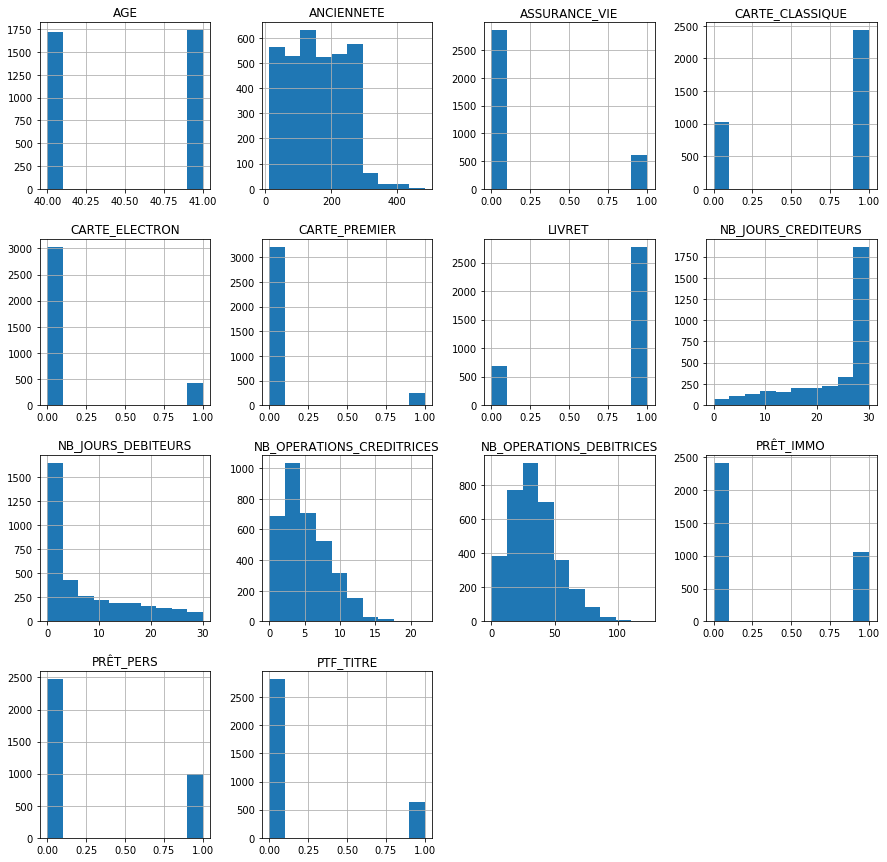

In [24]:
# Voir les variables entières ou réelles(continues ou discrètes) 
train[train.dtypes[(train.dtypes=="float64")|(train.dtypes=="int64")]
                                    .index.values].hist(figsize=[15,15])

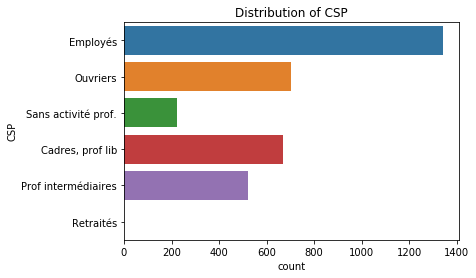

In [25]:
# See the distribution of gender to recognize different distributions
sns.countplot(y='CSP', data=train);
plt.title('Distribution of CSP');

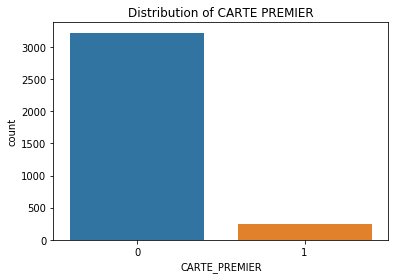

In [26]:
# See the distribution of gender to recognize different distributions
sns.countplot(x='CARTE_PREMIER', data=train);
plt.title('Distribution of CARTE PREMIER');

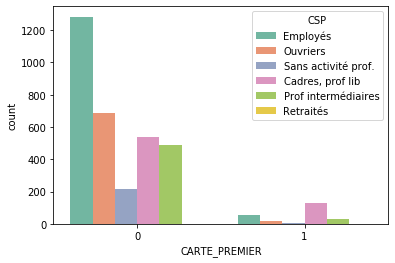

In [27]:
ax = sns.countplot(x="CARTE_PREMIER",hue="CSP", data=train, palette="Set2")

conclusion partielle: A première vue, il y a plus de cadres qui ont CP.

In [28]:
# LIVRET et CSP pour l'optention de la carte VP 
print(pd.crosstab(train['CSP'], train['CARTE_PREMIER']))

CARTE_PREMIER           0    1
CSP                           
Cadres, prof lib      541  128
Employés             1283   58
Ouvriers              689   15
Prof intermédiaires   491   31
Retraités               0    1
Sans activité prof.   215    8


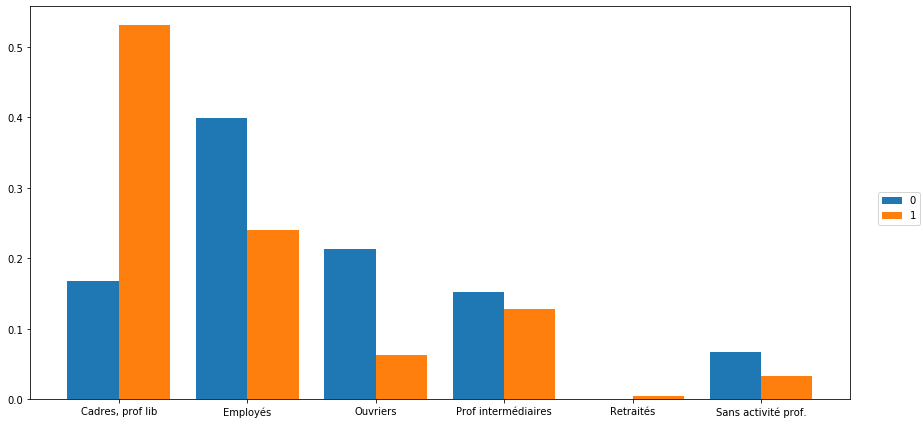

In [29]:
dxp.aggplot(agg='CSP', data=train, hue='CARTE_PREMIER', normalize='CARTE_PREMIER')
#0    3219 
#1     241
# Name: CARTE_PREMIER, dtype: int64

Conclusion: Parmi les personnes ayant souscrit à la CP, il y a 53% de cadres en profession libérale, 24% d'employés, 6% d'ouvriers, 13% de personnes en profession interdiaires, 3% de personnes sans activités et 1% de retraités.
Aussi, on constate que la plupart des employés n'ont pas souscrit à la CP parmi les profession présentes(presque 40%)

In [30]:
# dxp.aggplot(agg='CARTE PREMIER', data=train, hue='CSP', normalize='all')

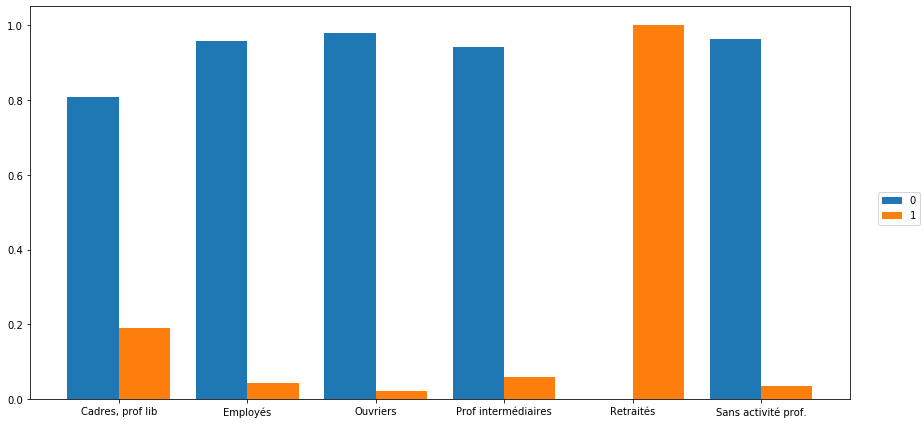

In [31]:
dxp.aggplot(agg='CSP', data=train, hue='CARTE_PREMIER', normalize='CSP')

Conclusion: On constate que parmi les cadres en profession libérale, il y a 19% ont la CP et 81% n'en ont pas. Et 
la plupart des ouvriers n'en possède.

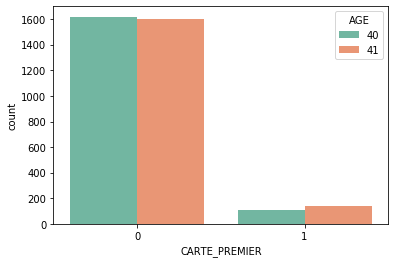

In [32]:
ax = sns.countplot(x="CARTE_PREMIER",hue="AGE", data=train, palette="Set2")

conclusion partielle: Il semble que ceux qui ont 41ans ont plus de chances que leur demande de la carte VP soit accéptée.

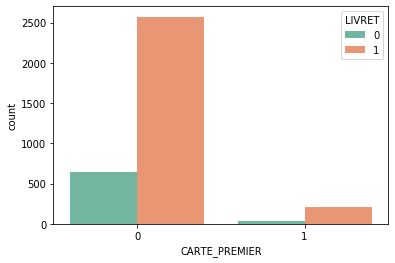

In [33]:
ax = sns.countplot(x="CARTE_PREMIER",hue="LIVRET", data=train, palette="Set2")

conclusion: La détention du Livret n'est pas vraiment un atout pour avoir la carte VP puisqu'il y a plus de refus chez ceux 
en possède que ceux qui n'en ont pas. 

In [34]:
#dxp.aggplot(agg='LIVRET', data=train, hue='CARTE PREMIER', normalize='CARTE PREMIER')

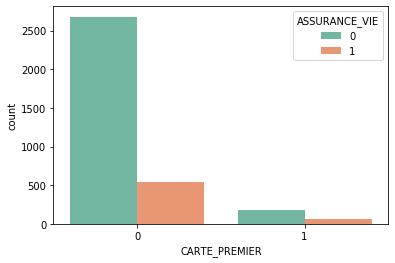

In [35]:
ax = sns.countplot(x="CARTE_PREMIER",hue="ASSURANCE_VIE", data=train, palette="Set2")

Concluion: Il y a plus de souscription chez les personnes n'ayant pas une assurance vie donc la détention n'est pas un critère.

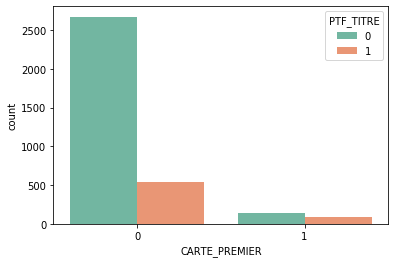

In [36]:
ax = sns.countplot(x="CARTE_PREMIER",hue="PTF_TITRE", data=train, palette="Set2")

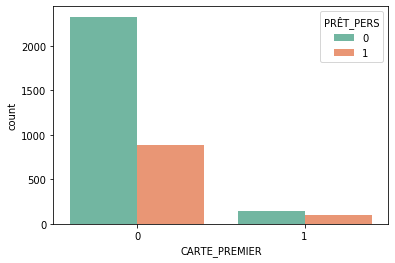

In [37]:
ax = sns.countplot(x="CARTE_PREMIER",hue="PRÊT_PERS", data=train, palette="Set2")

Il y a une tendance chez ceux qui n'ont pas de prêt encours.

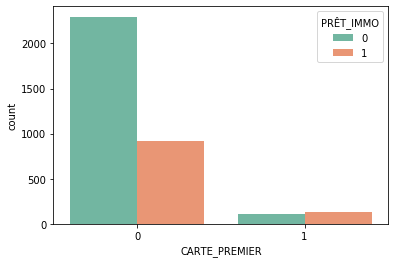

In [38]:
ax = sns.countplot(x="CARTE_PREMIER",hue="PRÊT_IMMO", data=train, palette="Set2")

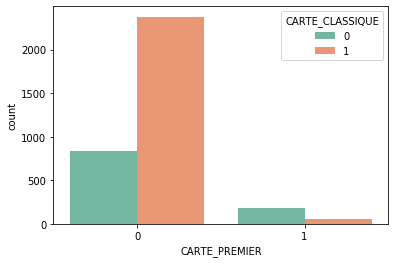

In [39]:
ax = sns.countplot(x="CARTE_PREMIER",hue="CARTE_CLASSIQUE", data=train, palette="Set2")

### Est-ce que la détention de la CP est liée à la CSP et à l'âge?

In [40]:
# L'âge avec l'optention de la carte VP 
print(pd.crosstab(train['AGE'], train['CARTE_PREMIER']))

CARTE_PREMIER     0    1
AGE                     
40             1618  105
41             1601  136


In [41]:
#calcul de la moyenne d'âge par CSP à l'obtension d'une carte CARTE PREMIER
print(pd.crosstab(train['CSP'],train['CARTE_PREMIER'],values=train['AGE'],aggfunc=pd.Series.mean))

CARTE_PREMIER                0          1
CSP                                      
Cadres, prof lib     40.489834  40.562500
Employés             40.492595  40.568966
Ouvriers             40.503628  40.400000
Prof intermédiaires  40.511202  40.580645
Retraités                  NaN  41.000000
Sans activité prof.  40.493023  40.750000


In [42]:
#Select only those whose demand are accepted  
train_CP = train[train['CARTE_PREMIER'] == 1]
# L'âge et CSP pour l'optention de la carte VP 
print(pd.crosstab(train_CP['CSP'], train_CP['AGE']))

AGE                  40  41
CSP                        
Cadres, prof lib     56  72
Employés             25  33
Ouvriers              9   6
Prof intermédiaires  13  18
Retraités             0   1
Sans activité prof.   2   6


Conclusion Il y a plus de cadre ayant 41 ans qui ont la CP.

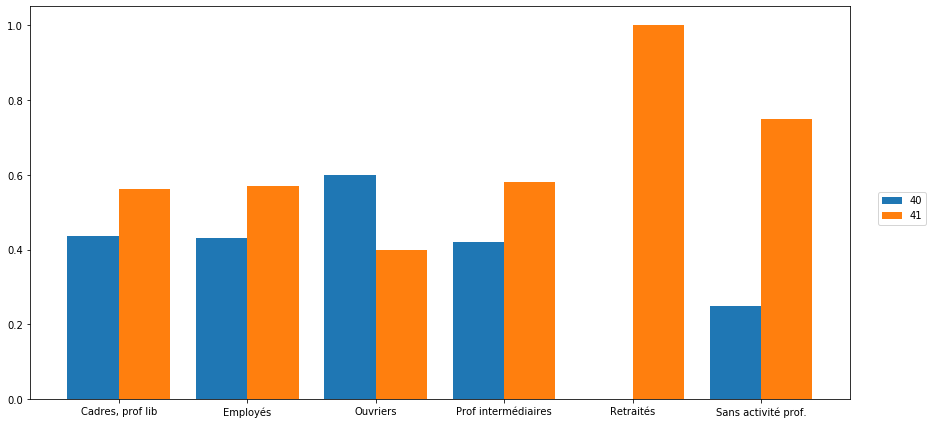

In [43]:
dxp.aggplot(agg='CSP', data=train_CP, hue='AGE', normalize='CSP')

Conclusion: Parmi les cadres en profession libérale, il y a 44% qui ont 40ans et 56% qui ont 41ans.

### Est-ce que la détention de la CP est liée à la CSP et à LIVRET?

In [44]:
# LIVRET et CSP pour l'optention de la carte VP 
print(pd.crosstab(train_CP['CSP'], train_CP['LIVRET']))

LIVRET                0    1
CSP                         
Cadres, prof lib     21  107
Employés              8   50
Ouvriers              1   14
Prof intermédiaires   3   28
Retraités             0    1
Sans activité prof.   2    6


In [45]:
#calcul de la moyenne d'âge par CSP à l'obtension d'une carte CARTE PREMIER
print(pd.crosstab(train_CP['CSP'],train_CP['LIVRET'],values=train['AGE'],aggfunc=pd.Series.mean))

LIVRET                       0          1
CSP                                      
Cadres, prof lib     40.476190  40.579439
Employés             40.500000  40.580000
Ouvriers             40.000000  40.428571
Prof intermédiaires  40.333333  40.607143
Retraités                  NaN  41.000000
Sans activité prof.  40.500000  40.833333


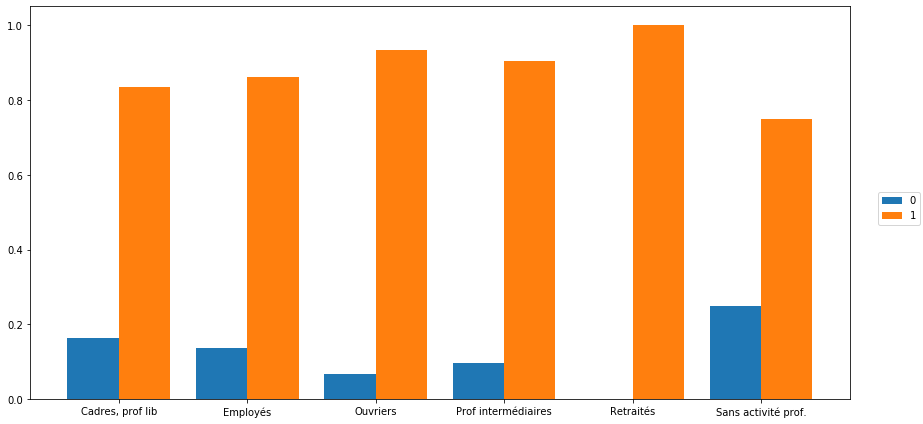

In [46]:
dxp.aggplot(agg='CSP', data=train_CP, hue='LIVRET', normalize='CSP')

Conclusion: Parmi les cadres en profession libérale détenteurs de CP, il y a  17% n'ayant pas le Livret et 83% qui l'ont.

#### Le fait d'avoir un prêt en cours a t-il un effet?

In [47]:
# percent of missing "CARTE PREMIER" 
print('Percent of missing "CARTE_PREMIER" records is %.2f%%' %((df['CARTE_PREMIER'].isnull().sum()/df.shape[0])*100))

Percent of missing "CARTE_PREMIER" records is 0.00%


### Selecting Feature

In [48]:
# CARTE PREMIER count
train['CARTE_PREMIER'].value_counts()

0    3219
1     241
Name: CARTE_PREMIER, dtype: int64

Conclusion: la variable à prédire est déséquilibrée(unbalanced dataset)

### Convertir les variables catégorielles en variables numériques

In [49]:
# Convert categorical variables to Numerical variables
train_conver= pd.get_dummies(train, prefix_sep = " ",drop_first = True)

In [50]:
train_conver.head()

,AGE,ANCIENNETE,CARTE_CLASSIQUE,CARTE_PREMIER,CARTE_ELECTRON,LIVRET,ASSURANCE_VIE,PTF_TITRE,PRÊT_PERS,PRÊT_IMMO,NB_JOURS_DEBITEURS,NB_JOURS_CREDITEURS,NB_OPERATIONS_CREDITRICES,NB_OPERATIONS_DEBITRICES,CSP Employés,CSP Ouvriers,CSP Prof intermédiaires,CSP Retraités,CSP Sans activité prof.,RESSOURCES 1,RESSOURCES 10,RESSOURCES 100,RESSOURCES 101,...,PNB 967,PNB 969,PNB 97,PNB 970,PNB 972,PNB 975,PNB 977,PNB 978,PNB 979,PNB 98,PNB 980,PNB 981,PNB 983,PNB 984,PNB 986,PNB 99,PNB 992,PNB 993,PNB 994,PNB 996,PNB 9 087,PNB 9 735,PNB 9 764
0,40,245,0,1,0,1,1,1,1,1,0,30,6,25,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,40,267,1,0,0,1,0,0,0,1,0,30,11,22,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,40,287,1,0,0,1,1,0,0,1,5,26,5,25,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,41,92,0,0,0,1,1,0,0,0,1,30,8,20,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,41,278,1,0,0,1,0,0,0,0,0,30,3,17,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [51]:
#split dataset in features and target variable
X = train_conver.drop(['CARTE_PREMIER'], axis=1) # Features
y = train_conver['CARTE_PREMIER'] # Target variable

# II-Model Development and Prediction

### A- Unbalanced dataset

### Splitting Data

In [52]:
# split X and y into training and testing sets: 80% for training and 20% for model testing.
X0_train,X0_test,y0_train,y0_test=train_test_split(X, y,test_size=0.20,random_state=42)

### Logistic Regression

In [53]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression()

In [54]:
# fit the model with data
logreg.fit(X0_train,y0_train)
#Predict Class Labels
y0_pred=logreg.predict(X0_test)

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [55]:
#Confusion Matrix
print(metrics.confusion_matrix(y0_test, y0_pred))

[[636  11]
 [ 27  18]]


In [56]:
#Classification Report
print(metrics.classification_report(y0_test, y0_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       647
           1       0.62      0.40      0.49        45

    accuracy                           0.95       692
   macro avg       0.79      0.69      0.73       692
weighted avg       0.94      0.95      0.94       692



In [57]:
print("Score Train -->", round(logreg.score(X0_train,y0_train) *100,2), " %")

Score Train --> 97.51  %


In [58]:
#Model Accuracy
print("Score Test -->",  round(logreg.score(X0_test,y0_test)*100,2), " %")

Score Test --> 94.51  %


### B- Balanced dataset  "Target variable y with SMOTE"

In [59]:
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_sm, y_sm = smote.fit_sample(X, y)

### Splitting Data

In [60]:
# split X and y into training and testing sets: 80% for training and 20% for model testing.
X_train,X_test,y_train,y_test=train_test_split(X_sm, y_sm,test_size=0.20,random_state=42)

### 1-  Logistic Regression

In [61]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression()

In [62]:
# fit the model with data
logreg.fit(X_train,y_train)
#Predict Class Labels
y_pred=logreg.predict(X_test)

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [63]:
#Confusion Matrix
print(metrics.confusion_matrix(y_test, y_pred))

[[609  48]
 [ 46 585]]


In [64]:
#Classification Report
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       657
           1       0.92      0.93      0.93       631

    accuracy                           0.93      1288
   macro avg       0.93      0.93      0.93      1288
weighted avg       0.93      0.93      0.93      1288



In [65]:
print("Score Train -->", round(logreg.score(X_train,y_train) *100,2), " %")

Score Train --> 93.84  %


In [66]:
#Model Accuracy
print("Score Test -->",  round(logreg.score(X_test,y_test)*100,2), " %")

Score Test --> 92.7  %


### 2- XGBoost Classification

In [67]:
# Instantiate XGBClassifier with default arguments
boost = XGBClassifier()

In [68]:
# model fit
xgb_fit = boost.fit(X_train,y_train)
xgb_fit

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [69]:
# prediction on test set
p_boost = xgb_fit.predict(X_test)

In [70]:
print("Score Train -->", round(boost.score(X_train,y_train) *100,2), " %")

Score Train --> 95.44  %


In [71]:
print("Score Test -->", round(boost.score(X_test,y_test)*100,2), "%")

Score Test --> 93.79 %


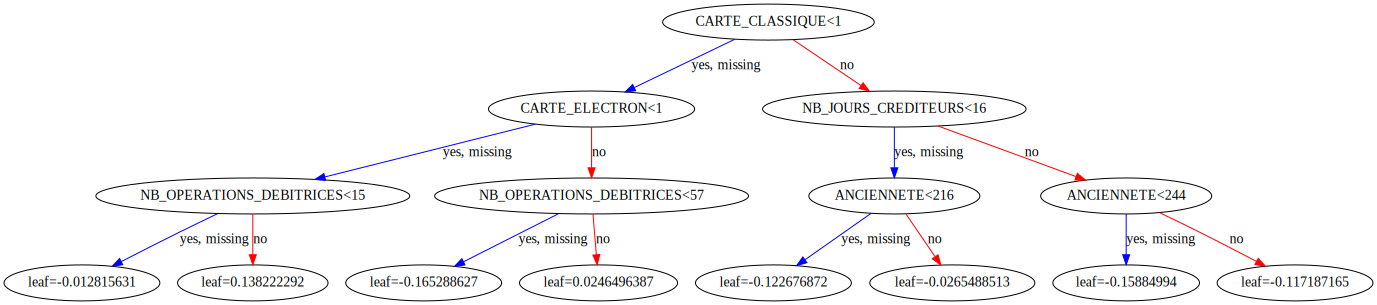

In [72]:
#Graphique présentant le résultat : "df.rename(columns = lambda x: x.replace(' ', '_'), inplace=True)"
# set figsize
figsize(8,6)
xgb.to_graphviz(xgb_fit, num_trees=2)

### a- Weight

The number of times a feature is used to split the data across all trees.

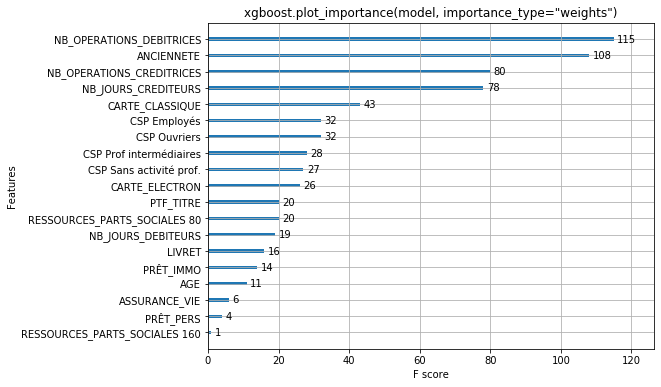

In [73]:
# Graphique présentant les champs par degré d’importance :
figsize(8,6)
xgb.plot_importance(xgb_fit)
plt.title('xgboost.plot_importance(model, importance_type="weights")')
plt.show()

### b- Cover

The number of times a feature is used to split the data across all trees weighted by the number of training data points that go through those splits.

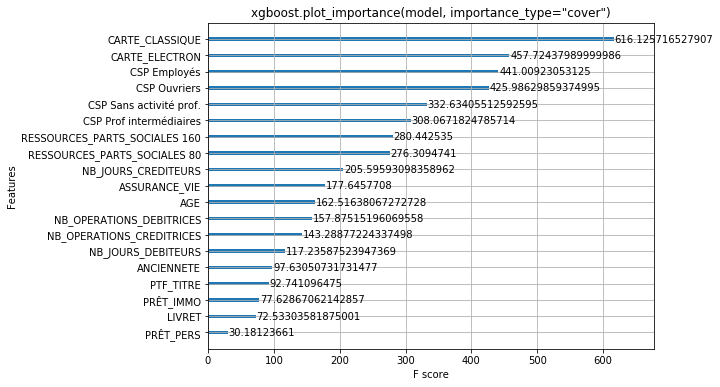

In [74]:
figsize(8,6)
xgb.plot_importance(xgb_fit, importance_type="cover")
plt.title('xgboost.plot_importance(model, importance_type="cover")')
plt.show()

### c- Gain

The average training loss reduction gained when using a feature for splitting.

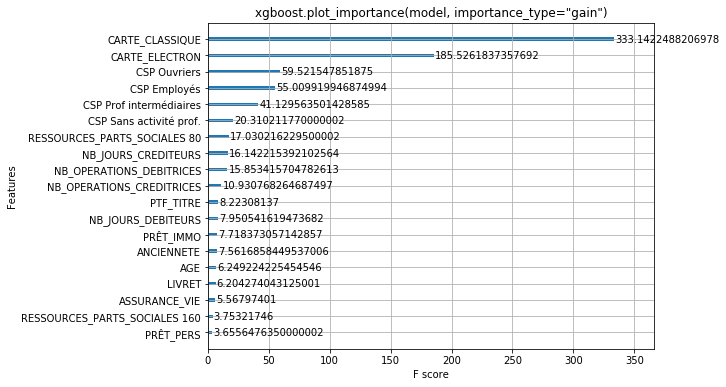

In [75]:
xgb.plot_importance(xgb_fit, importance_type="gain")
plt.title('xgboost.plot_importance(model, importance_type="gain")')
plt.show()

### 3-Explain predictions

In [76]:
# this takes a minute or two since we are explaining over 30 thousand samples in a model with over a thousand trees
explainer = shap.TreeExplainer(xgb_fit)
shap_values = explainer.shap_values(X_sm)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


#### -Visualize a single prediction

In [77]:
'''
X_display =X.columns
shap.force_plot(explainer.expected_value, shap_values[0:1000,0:1000], X_display[0,0:10])
'''

'\nX_display =X.columns\nshap.force_plot(explainer.expected_value, shap_values[0:1000,0:1000], X_display[0,0:10])\n'

#### -Visualize many predictions

In [78]:
'''
shap.force_plot(explainer.expected_value, shap_values[:1000,:], X_display[:1000,:])
'''

'\nshap.force_plot(explainer.expected_value, shap_values[:1000,:], X_display[:1000,:])\n'

#### a-Bar chart of mean importance

This takes the average of the SHAP value magnitudes across the dataset and plots it as a simple bar chart.

In [79]:
shap.summary_plot(shap_values, X_display, plot_type="bar")

NameError: name 'X_display' is not defined

### b-SHAP Summary Plot

In [ ]:
shap.summary_plot(shap_values, X_display)

### c- SHAP Dependence Plots

In [ ]:
shap.dependence_plot("CARTE_CLASSIQUE", shap_values, X_sm)

In [ ]:
shap.dependence_plot("AGE", shap_values, X_sm)

### 4- Simple supervised clustering

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

shap_pca50 = PCA(n_components=12).fit_transform(shap_values[:1000,:])
shap_embedded = TSNE(n_components=2, perplexity=50).fit_transform(shap_values[:1000,:])

In [ ]:
#import matplotlib
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.ticker import MaxNLocator
cdict1 = {
    'red': ((0.0, 0.11764705882352941, 0.11764705882352941),
            (1.0, 0.9607843137254902, 0.9607843137254902)),

    'green': ((0.0, 0.5333333333333333, 0.5333333333333333),
              (1.0, 0.15294117647058825, 0.15294117647058825)),

    'blue': ((0.0, 0.8980392156862745, 0.8980392156862745),
             (1.0, 0.3411764705882353, 0.3411764705882353)),

    'alpha': ((0.0, 1, 1),
              (0.5, 1, 1),
              (1.0, 1, 1))
}  # #1E88E5 -> #ff0052
red_blue_solid = LinearSegmentedColormap('RedBlue', cdict1)

In [ ]:
f = plt.figure(figsize=(5,5))
plt.scatter(shap_embedded[:,0],
           shap_embedded[:,1],
           c=shap_values[:1000,:].sum(1).astype(np.float64),
           linewidth=0, alpha=1., cmap=red_blue_solid)
cb = plt.colorbar(label="NB_OPERATIONS_DEBITRICES > 50", aspect=40, orientation="horizontal")
cb.set_alpha(1)
cb.draw_all()
cb.outline.set_linewidth(0)
cb.ax.tick_params('x', length=0)
cb.ax.xaxis.set_label_position('top')
plt.gca().axis("off")
plt.show()

In [ ]:
for feature in ["CARTE_CLASSIQUE", "NB_OPERATIONS_DEBITRICES", "CARTE_ELECTRON","ANCIENNETE"]:
    f = plt.figure(figsize=(5,5))
    plt.scatter(shap_embedded[:,0],
               shap_embedded[:,1],
               c=X[feature].values[:1000].astype(np.float64),
               linewidth=0, alpha=1., cmap=red_blue_solid)
    cb = plt.colorbar(label=feature, aspect=40, orientation="horizontal")
    cb.set_alpha(1)
    cb.draw_all()
    cb.outline.set_linewidth(0)
    cb.ax.tick_params('x', length=0)
    cb.ax.xaxis.set_label_position('top')
    plt.gca().axis("off")
    plt.show()

In [ ]:
'''

#import import_ipynb
!pip install pydotplus
import pydotplus
from sklearn.externals.six import StringIO
from IPython.display import Image

dot_train = StringIO()
export_graphviz(xgb_fit)
graph = pydotplus.graph_from_dot_train(dot_train.getvalue())
graph.write_png('dat.png')
Image(graph.create_png())

'''

# Stratified K-fold CV

In [ ]:
skf = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
skf.get_n_splits(X_sm, y_sm)

In [ ]:
accuracy = []
# X_sm feature set and y_sm Target set
for train_index, test_index in skf.split(X_sm, y_sm):
    print("TRAIN:", train_index, "TEST:", test_index)
    X1_train, X1_test = X_sm.loc[train_index], X_sm.loc[test_index]
    y1_train, y1_test = y_sm.loc[train_index], y_sm.loc[test_index]
    
    boost.fit(X1_train, y1_train)
    prediction = boost.predict(X1_test)
    score = accuracy_score(prediction, y1_test)
    accuracy.append(score)
print(accuracy)

In [ ]:
#Model Accuracy
print("le min accuracy -->",  round(np.array(accuracy).min()*100,2)," %")
print("la moyenne accuracy -->",  round(np.array(accuracy).mean()*100,2)," %")
print("le max accuracy -->",  round(np.array(accuracy).max()*100,2)," %")

### 3-Hyper-Parameters tuning

#### step 2:Tune max_depth and min_child_weight

In [ ]:
target ='CARTE_PREMIER'
predictors = [x for x in X.columns]
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(train_conver[predictors],train_conver[target])
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

#### step1: Fix learning rate and number of estimators for tuning tree-based parameters

In [ ]:
target ='CARTE_PREMIER'

def modelfit(alg, dtrain, predictors,useTrainCV=True, n_splits=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain[target].values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=n_splits,
            metrics='auc', early_stopping_rounds=early_stopping_rounds, show_progress=False)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain['CARTE_PREMIER'],eval_metric='auc')
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
        
    #Print model report:
    print("\nModel Report")
    print("Accuracy : %.4g" % metrics.accuracy_score(dtrain['CARTE_PREMIER'].values, dtrain_predictions))
    print("AUC Score (Train): %f" % metrics.roc_auc_score(dtrain['CARTE_PREMIER'], dtrain_predprob))
                    
    feat_imp = pd.Series(alg.booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')

In [ ]:
#Choose all predictors
predictors = [x for x in X.columns]
xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
modelfit(xgb1,train_conver, predictors)